- The following packages are needed: numpy, pandas, matplotlib, scipy, sklearn 

In [ ]:
from Process import GPModeling as gpm
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

import importlib
importlib.reload(gpm)

# Step 1: Load Data 
- The simpliest way to load in data is by providing the path of a txt or csv file which will be formatted as a dataframe.
- The miniumum information needed in these dataframes is three variables, often 2 compositions concentrations and a single measurment value. 
- Utilize the gpm.load_data_df() function.

In [10]:
path1 = r"C:\Users\anton\Desktop\OT2-DOE\PlanPrepareProcess\Temp or Working\07_29_21_Ocatdecane_Blanked_Abs_Complete"
full_data = gpm.load_datadf(path1)
full_data

,UID,Labware,Slot,Well,Octadecane concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,Octadecane amount mass g,Octadecane amount volume uL,...,755.0nm,760.0nm,765.0nm,770.0nm,775.0nm,780.0nm,785.0nm,790.0nm,795.0nm,800.0nm
0,S2_A1_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A1,0.000000,0.0005,0.2,0.799500,0.000000,0.000000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,S2_A2_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A2,0.000000,0.0005,0.4,0.599500,0.000000,0.000000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,S2_A3_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A3,0.000000,0.0005,0.6,0.399500,0.000000,0.000000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,S2_A4_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A4,0.000000,0.0005,0.8,0.199500,0.000000,0.000000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,S2_A5_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A5,0.000111,0.0005,0.3,0.699389,0.000133,0.171600,...,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,S2_F6_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F6,0.000889,0.0005,0.5,0.498611,0.001067,1.372801,...,0.477,0.472,0.467,0.462,0.457,0.453,0.449,0.444,0.439,0.434
65,S2_F7_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F7,0.000889,0.0005,0.7,0.298611,0.001067,1.372801,...,0.083,0.083,0.084,0.084,0.085,0.086,0.086,0.086,0.087,0.087
66,S2_F8_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F8,0.001000,0.0005,0.3,0.698500,0.001200,1.544402,...,0.299,0.295,0.291,0.287,0.283,0.279,0.275,0.272,0.268,0.264
67,S2_F9_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F9,0.001000,0.0005,0.5,0.498500,0.001200,1.544402,...,0.624,0.618,0.612,0.606,0.599,0.594,0.588,0.581,0.576,0.570


# Step 2: Select samples for analysis 
 - Some samples are not suitable for analysis if there is no meaningful data present, and could actually lead to misinterpretation given the forced fitting (GP can only ignore so much). This could be due to noticing foaming, settling or other impairments to measurements. These impairments should be qualified by some measurements such as a lack of a signficant count rate with a high level of turbidity (an indictor of something besides dispersions scattering light). For the case of dispersions, derived count rate below 5000 is a starting point to consider for unmeaningful data.
 - The easiest way to filter or remove these samples from your analysis set is by using dataframe logic to select the samples you want. 


In [23]:
full_data = full_data
# full_data = full_data[full_data['Run']==2]

x_data = full_data['ethanol concentration wtf'].tolist()
y_data = full_data['Octadecane concentration wtf'].tolist()
z_data = full_data['400.0nm'].tolist()

# Step 3: Visualize
- An easy way to see how the measurment variable is varying across the 2 compositional variables. Simply a quick check. 

(<matplotlib.collections.PathCollection at 0x186ceb62748>,
 <matplotlib.colorbar.Colorbar at 0x186ceba79b0>)

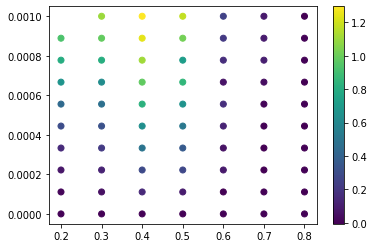

In [25]:
plt.scatter(x_data, y_data, c = z_data), plt.colorbar()

# Step 4: Standardizing and Setting Data for GP
- The main reason we standardize the data is to ensure wildly different scales of composition or measurment variables get weighted equally under GP modeling resolution conditions.
- GP modeling relies on traning data which we set as x1, x2, y variables = x, y, z in cartesian coordinates.
- When we standardize with need to save the scaler used for the standardization as to convert back to the original units once done with out modeling, we designated this as "variable_scalar".
- Once data has been scaled, we need to group x1 and x2 data into a single array grouped into a (1, n, 2) fashion.

In [29]:
x1_training = np.asarray(x_data)
x2_training = np.asarray(y_data)
y_training = np.asarray(z_data)

x1_training_scaled, x1_scalar = gpm.standardize_training(x1_training) # create n x 1 x 1 [[x11],[x12]]
x2_training_scaled, x2_scalar = gpm.standardize_training(x2_training)
y_training_scaled, y_scalar = gpm.standardize_training(y_training)
x1x2_training_scaled = gpm.coupled_two_arrays(x1_training_scaled, x2_training_scaled) # creates [[x11, x21],[x12, x22]]

# Step 5: Creating Modeling Parameters and Fitting Data
- We utilize the *GaussianProcessRegressor* modeling function from sklearn along with the RBF kernel to model dispersion measurements. A kernel is the blueprints telling a GP model how to converge and handle data, there are plenty of process specfic kernels out there and one can build their own, however RBF proves time and time again to be suitable for many cases. Simply put the RBF uses the distance between two points and determines a level of similarity, and aims to maximize this similarity. Therefore, it is important to ensure any outliers (true outliers like a huge jump in absorbance surronded by low absorbance) are removed. There could potentially be an issue with this if there is a start drop in measurment values such as in a boundary, however most boundaries encountered in reality have some sort of transition state. 

- RBF Specfic Parameters
    - length_scale = can be isotropic or specific to each parameter, often lower length = less complex model (aka less fitting).
    - length_scale_bounds = length scale search for optimized length scale
    - WhiteKernel = added noise in order to muddle out any remaining outliers and prevent overfitting

- Once the kernel is created we can feed it through the *GaussianProcessRegressor* to create the gpmodel function. 
    - n_restart_optimizers = how many times to attempt optimization
    - alpha = parameter tied to length scale that adds in noise.
  
- Finally we can fit model function by feeding in the x1_x2 and y data.

In [31]:
kernel = 1.0 * RBF(length_scale=1, length_scale_bounds=(1e-3, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1)) 

gpmodel = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.05, normalize_y=True) # random_state=42
gpmodel.fit(x1x2_training_scaled, y_training_scaled)
gpmodel.kernel.get_params()

{'k1': 1**2 * RBF(length_scale=1),
 'k2': WhiteKernel(noise_level=1),
 'k1__k1': 1**2,
 'k1__k2': RBF(length_scale=1),
 'k1__k1__constant_value': 1.0,
 'k1__k1__constant_value_bounds': (1e-05, 100000.0),
 'k1__k2__length_scale': 1,
 'k1__k2__length_scale_bounds': (0.001, 1000.0),
 'k2__noise_level': 1,
 'k2__noise_level_bounds': (1e-10, 10.0)}

# Step 6: Testing Mesh and Running through GP-Model 
- We create a mesh that spans the distance of the minimum and maximum of the two compositonal variables (x1, x2, after being standardized) using gpm.create_mesh_from_min_max() with the scaling factor seeing how far out to create the mesh (scale = 1 means 0% expansion). 
- We then grab the new x1 abnd x2 created by the mesh to run through the gpmodel 
    - Remember the gpmodel will need to have the x1 and x2 input variables in the same formate as the (1,n,2) training data. 

In [40]:
# Mesh
x1x2_test, x1_test, x2_test = gpm.create_mesh_from_min_max(x1_training_scaled, x2_training_scaled, scale = 1.5)

# Run mesh through GP model
x1_test_ex = x1x2_test[:,0][:,0]
x2_test_ex = x1x2_test[:,1][:,0]
x1x2_test_reform = np.asarray([x1_test_ex, x2_test_ex]).T
y_pred, MSE = gpmodel.predict(x1x2_test_reform, return_std=True) 

# Step 7: Setup variables for plotting. 
- Now we finally select our final x1, x2, and y variables that we will use for plotting the scatter plot, this is simple.
- The final step before plotting is to convert our new x1, x2, and y predictions back into original scales via the scaler we saved when standardizing.


In [43]:
# Select scatter plot points
x1 = x1_training
x2 = x2_training
y = y_training

# Revert back to original units and create mesh for plotting
x1_test_org = gpm.reverse_standardization(x1_scaler, x1x2_test[:,0])
x2_test_org = gpm.reverse_standardization(x2_scaler, x1x2_test[:,1])
y_pred_org =  gpm.reverse_standardization(y_scaler, y_pred)

# Just creating a 1xn array
x1_mesh_prep = np.asarray([round(i,12) for i in x1_test_org[:,0]])
x2_mesh_prep = np.asarray([round(i,12) for i in x2_test_org[:,0]])
y_mesh_prep = np.asarray([round(i,5) for i in y_pred_org[:,0]])

# Finding dimensions of original made mesh in order to create matching mesh and have y map values.
dim_x1_test = x1_test.shape[0] 
dim_x2_test = x2_test.shape[0]

X1 = x1_mesh_prep.reshape(dim_x2_test, dim_x1_test)
X2 = x2_mesh_prep.reshape(dim_x2_test, dim_x1_test)
Y = np.reshape(y_mesh_prep,(dim_x2_test, dim_x1_test))

gpmodel.score(x1x2_training_scaled, y_training_scaled, sample_weight=None)
# gpmodel.log_marginal_likelihood

0.9843021186514122

# Step 8: Plotting
- Plotting is initiated by fig, ax = plt.subplots(1)
- Color normalization is typically done by the vmin and vmax arguments which are the min and maximium color values which in reality should be the min and max of the predication or training Y values. 
- mappable is where our prepared mesh of x1 and x2 with our predicated y being mapped/reshaped to the values is fed and plotted. 

(-0.0001, 0.0011)

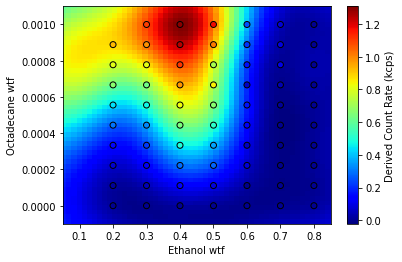

In [34]:
fig, ax = plt.subplots(1)
vmin = Y.min()
vmax = Y.max()
norm = colors.Normalize(vmin=vmin,vmax=vmax) 

mappable = ax.pcolormesh(X1,X2,Y, norm=norm, shading = 'auto',cmap='jet')
cbar = fig.colorbar(mappable)
cbar.ax.set_ylabel('Derived Count Rate (kcps)')
ax.scatter(x1,x2,c=y, norm=norm, edgecolors='k',cmap='jet')
ax.set_xlabel('Ethanol wtf')
ax.set_ylabel('Octadecane wtf')
ax.set_xlim(0.05,0.85)
ax.set_ylim(-0.0001,0.0011)

# plt.plot(ex_new, f(ex_new), '-', label='10C')
# plt.plot(ex_new_30, f30(ex_new), '-', label='30C')
# plt.plot(ex_new_60, f60(ex_new), '-', label='60C')
# plt.legend()

# Solubility data, ignore but do not delete

In [44]:
solubility_data = pd.read_excel(r"C:\Users\Edwin\Desktop\octadecene\octadecene solubility.xlsx")
solubility_data.columns = solubility_data.loc[0]
solubility_data = solubility_data.drop(0)
etoh = solubility_data['Ethanol wt% ']/100
ode_30 = solubility_data['30 C ']/100
ode_10 = solubility_data['10 C ']/100
ode_60 = solubility_data['60 C']/100

selected = ode_10
ex = etoh[selected.notnull()]
oy = selected[selected.notnull()]
plt.scatter(ex, oy)
f = interp1d(ex, oy, kind='linear')
ex_new = np.linspace(0, 1, num=20, endpoint=True)
plt.plot(ex, oy, 'o', ex_new, f(ex_new), '-')

selected = ode_30
ex = etoh[selected.notnull()]
oy = selected[selected.notnull()]
plt.scatter(ex, oy)
f30 = interp1d(ex, oy, kind='linear')
ex_new_30 = np.linspace(0, 1, num=20, endpoint=True)
plt.plot(ex, oy, 'o', ex_new_30, f30(ex_new), '-')

selected = ode_60
ex = etoh[selected.notnull()]
oy = selected[selected.notnull()]
plt.scatter(ex, oy)
f60 = interp1d(ex, oy, kind='linear')
ex_new_60 = np.linspace(0, 1, num=20, endpoint=True)
plt.plot(ex, oy, 'o', ex_new_60, f60(ex_new), '-')

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.